### This notebook implements the example on ch. 2, p.54, *Using a Perceptron to Identify Patterns*

In [74]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Random seed
# random.seed(seed)
# np.random.seed(seed)

# Perceptron
def compute_output(w, x):
    """Computes the output of a perceptron"""
    z = np.dot(w, x)
    if z < 0:
        return(-1, z)
    else:
        return(1, z)
    
def show_learning(w):
    """Print all the weights"""
    strings = ["w%d = %5.2f" % (i, x) for i,x in enumerate(w)]
    print(" , ".join(strings))
    
def make_patterns(pattern_size = (3,3)):
    """Make all the binary patterns for a grid of pixels. Pixel values are -1 and +1.
    Indicies are [pattern number, row, col]"""
    
    # Rows and columns
    rows = pattern_size[0]
    cols = pattern_size[1]

    # Construct the datasets
    pattern_size = (rows, cols)

    # Number of elements
    N = rows * cols

    # Format for binary representation with N bits
    binformat= '{:0%db}' % N

    # Number of unique patterns
    num_patterns = 2 ** N

    # Make an array of patterns
    patterns = np.zeros((num_patterns, rows, cols))
    for i in range(num_patterns):
        pattern = np.sign(np.array([int(x) for x in binformat.format(i)]) - 0.5)
        patterns[i,:,:] = np.reshape(pattern, pattern_size)
    
    # Return the patterns
    return(patterns)

def patterns2vec(patterns):
    num_patterns = patterns.shape[0]
    num_el = np.prod(patterns[0,:,:].shape)
    vectors = [np.concatenate([np.array([1]), patterns[i, :, :].flatten()]) for i in range(num_patterns)]
    return(vectors)

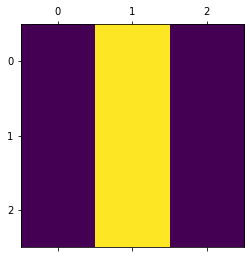

In [92]:
# Hyperparameters
seed = 0
LEARNING_RATE = 0.1

# Pattern size
pattern_size = (3,3)

# Make the patterns
patterns = make_patterns(pattern_size)

# Number of patterns
num_patterns = patterns.shape[0]

# Training vector from patterns
x_train = patterns2vec(patterns)

# Vector of target values
# target_idx = np.random.randint(low=0, high=num_patterns-1)
target_idx = 146
y_train = np.zeros(num_patterns, dtype=float) - 1 # Target value is -1 for all but the target pattern
y_train[target_idx] = 1.0 # Target value is +1 for the target pattern

plt.matshow(patterns[target_idx, :, :])
# plt.xticks([])
# plt.yticks([])
plt.clim([-1, 1])
plt.show()

In [93]:
# Initialize weights according to normal distribution with mean of 0
weights = np.random.standard_normal(size=np.prod(pattern_size)+1)
print("Initial Weights: ")
print(str(weights))

# Training loop
all_correct = False
idx = [x for x in range(num_patterns)]
epoch = 0
epochs = 10

for epoch in range(epochs):
    random.shuffle(idx)
    correct = 0
    incorrect = 0
    predictions = np.zeros((num_patterns))
    scores = np.zeros((num_patterns))
    
    # Inference on all the examples
    for i in idx:
        x = x_train[i]
        y = y_train[i]
        y_pred, score = compute_output(weights, x)
        predictions[i] = y_pred
        scores[i] = score
        
        # If the example is wrong, update weights
        if y_pred != y:
            weights = weights - LEARNING_RATE * x
            incorrect += 1
        else:
            correct += 1
    
    # All the predictions
    idxMax = np.argmax(scores)
    max_score = scores[idxMax]
    
    pct_correct = 100 * correct / num_patterns
#     print("Epoch %d: %d correct, %d incorrect (%0.2f%% correct)" % (epoch, correct, incorrect, pct_correct))
#     print("Max score idx: " + str(idxMax))
#     print("Max score: " + str(max_score))
#     print()
        
        

Initial Weights: 
[ 1.27921371 -0.13639874  0.77964751  0.73475173  2.0430136  -0.36758383
  1.36624604  0.39249679 -0.08530574 -0.26556793]


In [91]:
weights[1:]

array([ 0.57889373, -0.4435996 , -0.25432169,  0.8876939 , -0.40094174,
        0.49269864,  0.46335731, -0.5297571 ,  0.64467936])